In [1]:
from keras.utils import to_categorical, np_utils
from keras.callbacks import EarlyStopping
from keras.models import Sequential, Model, Input
from keras.layers import (Dense, Reshape, Activation,
                          LSTM, Convolution2D, Flatten, 
                          MaxPooling1D, MaxPooling2D, Dropout, Bidirectional, BatchNormalization, GlobalAveragePooling2D)
from keras.optimizers import Adam
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

# Loading in data and generating training, valdiation and test sets

In [4]:
def convert_format(file):
    df = pd.read_csv(file,header=None)
    seqs = zip(df[2],df[1])
    seqs = list(seqs)
    seqs = list(map(list, seqs))
    
    for i in range(len(seqs)):
        if len(seqs[i][0]) > 100:
            seqs[i][0] = seqs[i][0][:100]
            seqs[i][1] = seqs[i][1][:100]
    
    base_to_value = {45 : 48 ,65 : 49, 71 : 50 , 67 : 51 , 84 : 52}

    seqs = list(map(lambda x: [[int(i.upper().translate(base_to_value)) for i in x[0]],
                                  [int(i.upper().translate(base_to_value)) for i in x[1]]], seqs ))
    
   
    seqs = to_categorical(seqs)
    return seqs
    

In [5]:
os.chdir('/Users/beth/Desktop/MetisProject5data_2/')

In [6]:
normal_bladder = convert_format("bladder_normal.csv")
normal_breast = convert_format("breast_normal.csv")
normal_colorectal = convert_format("colorectal_normal.csv")
normal_glioblastoma = convert_format("glioblastoma_normal.csv")
normal_glioma = convert_format("glioma_normal.csv")
normal_lung = convert_format("lung_normal.csv")
normal_pancreatic = convert_format("pancreatic_normal.csv")
normal_prostate = convert_format("prostate_normal.csv")
normal_renal = convert_format("renal_normal.csv")
normal_skin = convert_format("skin_normal.csv")
normal_stomach = convert_format("stomach_normal.csv")
normal_uterine = convert_format("uterine_normal.csv")
normal_liver = convert_format("liver_normal.csv")

In [7]:
tumor_bladder = convert_format("bladder_tumor.csv")
tumor_breast = convert_format("breast_tumor.csv")
tumor_colorectal = convert_format("colorectal_tumor.csv")
tumor_glioblastoma = convert_format("glioblastoma_tumor.csv")
tumor_glioma = convert_format("glioma_tumor.csv")
tumor_lung = convert_format("lung_tumor.csv")
tumor_pancreatic = convert_format("pancreatic_tumor.csv")
tumor_prostate = convert_format("prostate_tumor.csv")
tumor_renal = convert_format("renal_tumor.csv")
tumor_skin = convert_format("skin_tumor.csv")
tumor_stomach = convert_format("stomach_tumor.csv")
tumor_uterine = convert_format("uterine_tumor.csv")
tumor_liver = convert_format("liver_tumor.csv")

In [8]:
normal_glio = np.concatenate([normal_glioma,normal_glioblastoma],axis=0)
tumor_glio = np.concatenate([tumor_glioma,tumor_glioblastoma],axis=0)

In [9]:
del normal_glioma,normal_glioblastoma,tumor_glioma,tumor_glioblastoma

In [10]:
np.random.seed(11)

In [11]:
def train_test_split(array):
    indices=np.random.randint(array.shape[0], size=2000)
    test = array[indices]
    train = array[[i for i in range(array.shape[0]) if not i in indices]]
    return test, train

In [12]:
bladder_test, bladder_train = train_test_split(tumor_bladder)
del tumor_bladder
breast_test, breast_train = train_test_split(tumor_breast)
del tumor_breast
colorectal_test, colorectal_train = train_test_split(tumor_colorectal)
del tumor_colorectal

In [13]:
glio_test, glio_train = train_test_split(tumor_glio)
del tumor_glio
lung_test, lung_train = train_test_split(tumor_lung)
del tumor_lung
pancreatic_test, pancreatic_train = train_test_split(tumor_pancreatic)
del tumor_pancreatic

In [14]:
renal_test, renal_train = train_test_split(tumor_renal)
del tumor_renal
prostate_test, prostate_train = train_test_split(tumor_prostate)
del tumor_prostate
skin_test, skin_train = train_test_split(tumor_skin)
del tumor_skin
stomach_test, stomach_train = train_test_split(tumor_stomach)
del tumor_stomach
uterine_test, uterine_train = train_test_split(tumor_uterine)
del tumor_uterine
liver_test, liver_train = train_test_split(tumor_liver)
del tumor_liver

In [15]:
bladder_test_normal, bladder_train_normal = train_test_split(normal_bladder)
del normal_bladder
breast_test_normal, breast_train_normal = train_test_split(normal_breast)
del normal_breast
colorectal_test_normal, colorectal_train_normal = train_test_split(normal_colorectal)
del normal_colorectal
glio_test_normal, glio_train_normal = train_test_split(normal_glio)
del normal_glio
lung_test_normal, lung_train_normal = train_test_split(normal_lung)
del normal_lung
pancreatic_test_normal, pancreatic_train_normal = train_test_split(normal_pancreatic)
del normal_pancreatic
renal_test_normal, renal_train_normal = train_test_split(normal_renal)
del normal_renal
prostate_test_normal, prostate_train_normal = train_test_split(normal_prostate)
del normal_prostate
skin_test_normal, skin_train_normal = train_test_split(normal_skin)
del normal_skin
stomach_test_normal, stomach_train_normal = train_test_split(normal_stomach)
del normal_stomach
uterine_test_normal, uterine_train_normal = train_test_split(normal_uterine)
del normal_uterine
liver_test_normal, liver_train_normal = train_test_split(normal_liver)
del normal_liver

In [16]:
y_train_tumor = [1]*bladder_train.shape[0]+[2]*breast_train.shape[0]+[3]*colorectal_train.shape[0]+[4]*glio_train.shape[0]+[5]*lung_train.shape[0]\
+[6]*pancreatic_train.shape[0]+[7]*renal_train.shape[0]+[8]*prostate_train.shape[0]+[9]*skin_train.shape[0]+[10]*stomach_train.shape[0]\
+[11]*uterine_train.shape[0]+[12]*liver_train.shape[0]

In [17]:
len(y_train_tumor)

1949597

In [18]:
tumor = np.concatenate([bladder_train,breast_train,colorectal_train],axis=0)

In [19]:
tumor = np.concatenate([tumor,glio_train],axis=0)

In [20]:
del bladder_train, breast_train, colorectal_train, glio_train

In [21]:
tumor = np.concatenate([tumor,lung_train,pancreatic_train,renal_train],axis=0)

In [22]:
del lung_train, pancreatic_train, renal_train

In [23]:
tumor = np.concatenate([tumor,prostate_train,skin_train,stomach_train],axis=0)

In [24]:
del prostate_train,skin_train,stomach_train

In [25]:
tumor = np.concatenate([tumor,uterine_train],axis=0)

In [26]:
del uterine_train

In [27]:
tumor = np.concatenate([tumor,liver_train],axis=0)
del liver_train

In [28]:
tumor.shape

(1949597, 2, 100, 5)

In [29]:
from collections import defaultdict

In [30]:
class_weights = defaultdict(int)
for i in range(1,13):
    class_weights[i]=y_train_tumor.count(i)

In [31]:
class_weights

defaultdict(int,
            {1: 107117,
             2: 107389,
             3: 207692,
             4: 87689,
             5: 168669,
             6: 22879,
             7: 17011,
             8: 23083,
             9: 324124,
             10: 150114,
             11: 697337,
             12: 36493})

In [32]:
y_train_normal = [0]*(bladder_train_normal.shape[0]+breast_train_normal.shape[0]+colorectal_train_normal.shape[0]+glio_train_normal.shape[0]+lung_train_normal.shape[0]\
+pancreatic_train_normal.shape[0]+renal_train_normal.shape[0]+prostate_train_normal.shape[0]+skin_train_normal.shape[0]+stomach_train_normal.shape[0]+uterine_train_normal.shape[0]+liver_train_normal.shape[0])


In [33]:
len(y_train_normal)

1951011

In [34]:
normal = np.concatenate([bladder_train_normal,breast_train_normal,colorectal_train_normal],axis=0)

In [35]:
normal = np.concatenate([normal,glio_train_normal],axis=0)

In [36]:
del bladder_train_normal, breast_train_normal, colorectal_train_normal, glio_train_normal

In [37]:
normal = np.concatenate([normal,lung_train_normal,pancreatic_train_normal,renal_train_normal],axis=0)

In [38]:
del lung_train_normal, pancreatic_train_normal, renal_train_normal

In [39]:
normal = np.concatenate([normal,prostate_train_normal,skin_train_normal,stomach_train_normal],axis=0)

In [40]:
del prostate_train_normal,skin_train_normal,stomach_train_normal

In [41]:
normal = np.concatenate([normal,uterine_train_normal, liver_train_normal],axis=0)
del uterine_train_normal, liver_train_normal

In [42]:
normal.shape[0]

1951011

In [43]:
class_weights[0]=normal.shape[0]

In [44]:
class_weights

defaultdict(int,
            {1: 107117,
             2: 107389,
             3: 207692,
             4: 87689,
             5: 168669,
             6: 22879,
             7: 17011,
             8: 23083,
             9: 324124,
             10: 150114,
             11: 697337,
             12: 36493,
             0: 1951011})

In [45]:
for key in class_weights.keys():
    class_weights[key]=class_weights[0]/class_weights[key]

In [46]:
class_weights

defaultdict(int,
            {1: 18.213831604693933,
             2: 18.167698740094423,
             3: 9.393770583363827,
             4: 22.249210277229754,
             5: 11.567098874126247,
             6: 85.27518685257223,
             7: 114.69114102639469,
             8: 84.52155265780011,
             9: 6.019335192704027,
             10: 12.996862384587713,
             11: 2.7978022104090274,
             12: 53.46260926753076,
             0: 1.0})

In [47]:
y_train = y_train_tumor + y_train_normal

In [48]:
len(y_train)

3900608

In [49]:
X_train = np.concatenate([tumor,normal],axis=0)
del tumor,normal

In [50]:
X_train.shape

(3900608, 2, 100, 5)

In [51]:
y_train = to_categorical(y_train)

In [52]:
del train_test_split
from sklearn.model_selection import train_test_split

In [53]:
X_train.shape

(3900608, 2, 100, 5)

In [54]:
y_train.shape

(3900608, 13)

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=11, stratify=y_train)

# Training the model
Several numbers of CNN layers and filters were tried and the two-layer network below worked best for recall of multiple different tumor types

In [2]:
model=Sequential()

model.add(Convolution2D(input_shape=(2,100,5),
                       filters=100,
                       kernel_size=(2,3),
                       padding="same",
                       activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=2,
                       padding="same"))

model.add(Convolution2D(filters=50,
                       kernel_size=(2,2),
                       padding="same",
                       activation="relu"))
model.add(MaxPooling2D(pool_size=2,
                       padding="same"))
model.add(BatchNormalization(axis=-1))

model.add(GlobalAveragePooling2D())

model.add(Dense(units=13))
model.add(Activation('softmax'))

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 2, 100, 100)       3100      
_________________________________________________________________
batch_normalization_3 (Batch (None, 2, 100, 100)       400       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 50, 100)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 50, 50)         20050     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 25, 50)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 1, 25, 50)         200       
_________________________________________________________________
global_average_pooling2d_2 ( (None, 50)               

In [62]:
callback = EarlyStopping(monitor='val_loss', patience=3)

In [90]:
callback_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, min_delta = 0.2,
                              patience=1, min_lr=0.00001)

In [91]:
optimizer = Adam(lr=0.001)

In [72]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['categorical_crossentropy','accuracy'])

### Note: 
This model was trained for 2 epochs batch size 10000 before the ones shown below, training was stopped and restarted to adjust learning rate. Initial learning rate was 0.1 but I was not sure if the learning rate callback was kicking in. In every CNN model I tested the training and validation loss and accuracy both plateaued after 2-3 epochs. 

In [73]:
model.fit(X_train, y_train, epochs=100, batch_size=5000,
              validation_data=(X_val, y_val),verbose=True, callbacks=[callback,callback_lr], class_weight=class_weights)

Train on 3510547 samples, validate on 390061 samples
Epoch 1/100
3510547/3510547 [==============================] - 2973s 847us/step - loss: 14.4177 - categorical_crossentropy: 1.7163 - accuracy: 0.5166 - val_loss: 1.6740 - val_categorical_crossentropy: 1.6740 - val_accuracy: 0.5344
Epoch 2/100
3510547/3510547 [==============================] - 2791s 795us/step - loss: 14.3659 - categorical_crossentropy: 1.7052 - accuracy: 0.5173 - val_loss: 1.7432 - val_categorical_crossentropy: 1.7432 - val_accuracy: 0.5145
Epoch 3/100
3510547/3510547 [==============================] - 2859s 814us/step - loss: 14.2848 - categorical_crossentropy: 1.6933 - accuracy: 0.5188 - val_loss: 1.6950 - val_categorical_crossentropy: 1.6950 - val_accuracy: 0.5173
Epoch 4/100
1610000/3510547 [============>.................] - ETA: 26:37 - loss: 14.2806 - categorical_crossentropy: 1.6896 - accuracy: 0.5185

KeyboardInterrupt: 

In [89]:
#model_json = model.to_json()
with open("model_more_filters.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_more_filters.h5")

## Predictions on Validation Set

In [74]:
predictions = model.predict(X_val)

In [467]:
from sklearn.metrics import confusion_matrix

In [75]:
predictions_01 = np.argmax(predictions,axis=1) 

In [76]:
pd.Series(predictions_01).value_counts()

0     156424
9      41067
8      31071
12     30297
6      26310
11     24680
5      20843
1      18799
10     17534
7      14789
4       5165
3       2218
2        864
dtype: int64

In [77]:
pd.Series(np.argmax(y_val,axis=1)).value_counts()

0     195101
11     69734
9      32413
3      20769
5      16867
10     15011
2      10739
1      10712
4       8769
12      3649
8       2308
6       2288
7       1701
dtype: int64

In [78]:
y_val_01= np.argmax(y_val,axis=1)

In [98]:
confusion = confusion_matrix(y_val_01,predictions_01)

In [99]:
confusion_sum=confusion.sum(axis=1)

In [100]:
confusion_sum

array([195101,  10712,  10739,  20769,   8769,  16867,   2288,   1701,
         2308,  32413,  15011,  69734,   3649])

In [101]:
confusion2=[]
for i in range(0,13):
    confusion2.append(confusion[i]/confusion_sum[i])

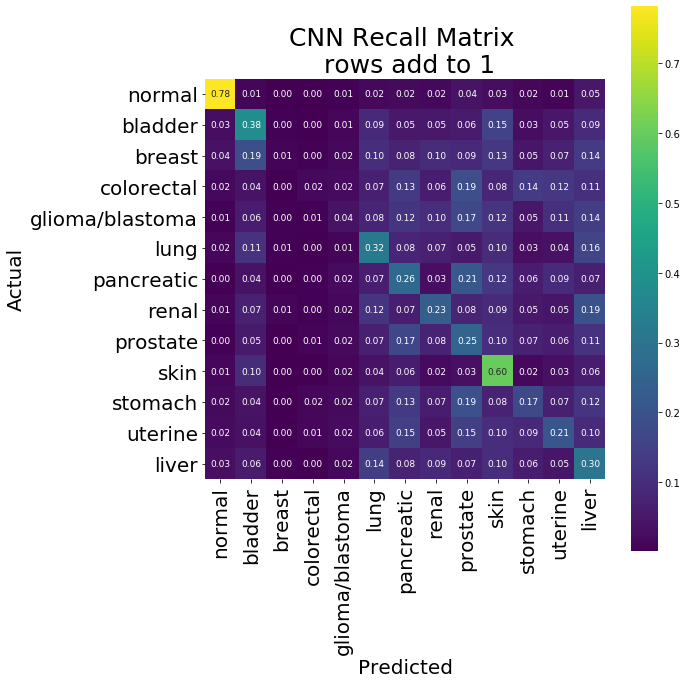

In [103]:
plt.figure(figsize=(10,10))

sns.heatmap(confusion2,square=True,cmap="viridis",annot=True,annot_kws={'size':9},xticklabels=['normal','bladder','breast','colorectal',\
                                               'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver'],
           yticklabels=['normal','bladder','breast','colorectal',\
                                               'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver'],fmt='.2f')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.title('CNN Recall Matrix \n rows add to 1', fontsize=25)
plt.tight_layout()
plt.savefig('recall_more_filters.jpg');

In [104]:
def print_stats(confusion_matrix):
    for i, v in enumerate(['normal','bladder','breast','colorectal',\
                        'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver']):
        recall = confusion[i,i]/sum(confusion[i])
        percision = confusion[i,i]/sum(confusion[:,i])
        print("{} recall: {}".format(v,recall))
        print("{} percision: {}".format(v,percision))
        print("\n")

In [105]:
print_stats(confusion) #for validataion set

normal recall: 0.781892455702431
normal percision: 0.9752211936787194


bladder recall: 0.3817214339058999
bladder percision: 0.21751156976434916


breast recall: 0.0075426017320048425
breast percision: 0.09375


colorectal recall: 0.0174298232943329
colorectal percision: 0.16321009918845808


glioma/blastoma recall: 0.03808872163302543
glioma/blastoma percision: 0.06466602129719265


lung recall: 0.3172466947293532
lung percision: 0.2567288778007005


pancreatic recall: 0.263986013986014
pancreatic percision: 0.022957050551121246


renal recall: 0.2328042328042328
renal percision: 0.026776658327135033


prostate recall: 0.25086655112651646
prostate percision: 0.018634739789514337


skin recall: 0.598926356708728
skin percision: 0.472715318869165


stomach recall: 0.17440543601359004
stomach percision: 0.1493099121706399


uterine recall: 0.20938136346688846
uterine percision: 0.591612641815235


liver recall: 0.3030967388325569
liver percision: 0.03650526454764498




# Predictions on hold-out test set

In [106]:
final_test = np.concatenate([bladder_test, breast_test, colorectal_test, glio_test, lung_test, pancreatic_test,
                            prostate_test, renal_test, skin_test, stomach_test, uterine_test, liver_test])

In [107]:
final_test.shape

(24000, 2, 100, 5)

In [169]:
del bladder_test, breast_test, colorectal_test, glio_test, lung_test, pancreatic_test, prostate_test, renal_test, skin_test, stomach_test, uterine_test, liver_test

In [108]:
final_normal_test = np.concatenate([bladder_test_normal, breast_test_normal, colorectal_test_normal,
                            glio_test_normal, lung_test_normal, prostate_test_normal, pancreatic_test_normal, renal_test_normal,
                            skin_test_normal, stomach_test_normal, uterine_test_normal, liver_test_normal])

In [109]:
final_test_true = [1]*2000+[2]*2000+[3]*2000+[4]*2000+[5]*2000+[6]*2000+[8]*2000+[7]*2000+[9]*2000+[10]*2000+[11]*2000+[12]*2000

In [111]:
final_test_true = to_categorical(final_test_true)

In [112]:
preds = model.predict(final_test)

In [113]:
predictions_01 = np.argmax(preds,axis=1) 

In [114]:
pd.Series(predictions_01).value_counts()

9     3497
12    3258
8     3111
6     2814
5     2436
1     2314
11    1934
7     1903
10    1598
4      515
0      369
3      150
2      101
dtype: int64

In [115]:
pd.Series(np.argmax(final_test_true,axis=1)).value_counts()

12    2000
11    2000
10    2000
9     2000
8     2000
7     2000
6     2000
5     2000
4     2000
3     2000
2     2000
1     2000
dtype: int64

In [116]:
y_val_01= np.argmax(final_test_true,axis=1)

In [227]:
from sklearn.metrics import confusion_matrix

In [117]:
confusion = confusion_matrix(y_val_01,predictions_01)

In [118]:
confusion = confusion[1:,:]

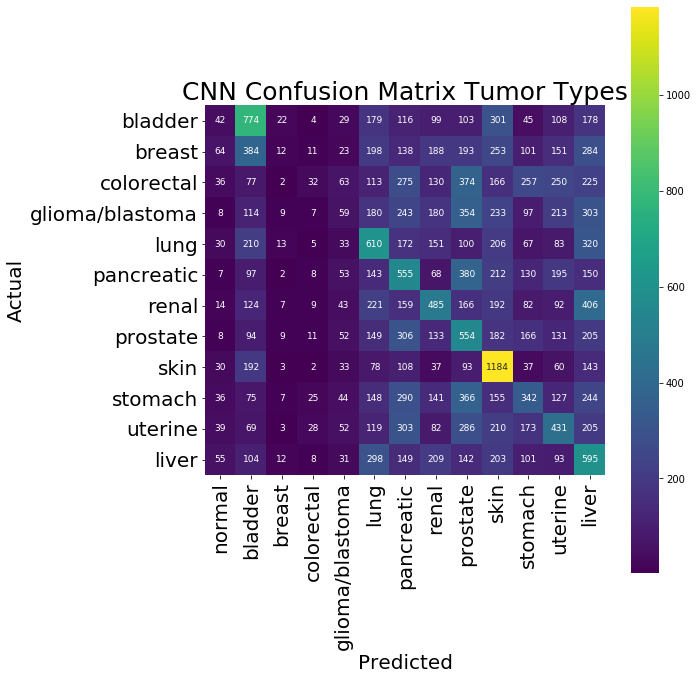

In [119]:
plt.figure(figsize=(10,10))

sns.heatmap(confusion,square=True,cmap="viridis",annot=True,annot_kws={'size':9},xticklabels=['normal','bladder','breast','colorectal',\
                                               'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver'],
           yticklabels=['bladder','breast','colorectal',\
                                               'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver'],fmt='.0f')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.title('CNN Confusion Matrix Tumor Types', fontsize=25)
plt.tight_layout()
plt.savefig('more_filters_confusion.jpg');

In [132]:
preds_normal = model.predict(final_normal_test)

In [133]:
predictions_01 = np.argmax(preds_normal,axis=1) 

In [134]:
pd.Series(predictions_01).value_counts()

0     18625
12     1162
8       945
9       648
6       512
5       472
7       465
10      410
1       336
11      229
4       137
3        36
2        23
dtype: int64

In [135]:
y_val_01= np.zeros(24000)

In [136]:
confusion = confusion_matrix(y_val_01,predictions_01)

In [141]:
confusion2 = confusion[0,:]

In [142]:
confusion2

array([18625,   336,    23,    36,   137,   472,   512,   465,   945,
         648,   410,   229,  1162])

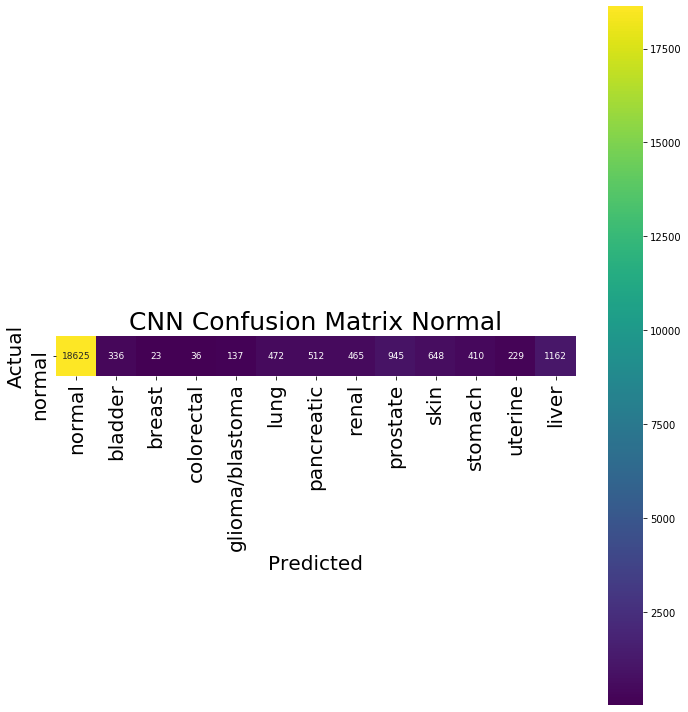

In [143]:
plt.figure(figsize=(10,10))

sns.heatmap(confusion2.reshape([-1,13]),square=True,cmap="viridis",annot=True,annot_kws={'size':9},xticklabels=['normal','bladder','breast','colorectal',\
                                               'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver'],
           yticklabels=['normal'],fmt='.0f')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.title('CNN Confusion Matrix Normal', fontsize=25)
plt.tight_layout()
plt.savefig('more_filters_confusion_normal.jpg');

In [145]:
preds = model.predict(np.concatenate([final_test,final_normal_test],axis=0))

In [147]:
final_test_true = [1]*2000+[2]*2000+[3]*2000+[4]*2000+[5]*2000+[6]*2000+[8]*2000+[7]*2000+[9]*2000+[10]*2000+[11]*2000+[12]*2000

In [148]:
final_normal_test_true = [0]*24000

In [149]:
true = final_test_true + final_normal_test_true

In [150]:
true = to_categorical(true)

In [151]:
predictions_01 = np.argmax(preds,axis=1) 

In [154]:
y_val_01 = np.argmax(true,axis=1)

In [155]:
confusion = confusion_matrix(y_val_01,predictions_01)

In [158]:
def print_stats(confusion_matrix):
    for i, v in enumerate(['normal','bladder','breast','colorectal',\
                        'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver']):
        recall = confusion[i,i]/sum(confusion[i])
        percision = confusion[i,i]/sum(confusion[:,i])
        print("{} recall: {}".format(v,recall))
        print("{} precision: {}".format(v,percision))
        print("\n")

In [159]:
print_stats(confusion) #for holdout test set

normal recall: 0.7760416666666666
normal precision: 0.9805728124670948


bladder recall: 0.387
bladder precision: 0.2920754716981132


breast recall: 0.006
breast precision: 0.0967741935483871


colorectal recall: 0.016
colorectal precision: 0.17204301075268819


glioma/blastoma recall: 0.0295
glioma/blastoma precision: 0.09049079754601227


lung recall: 0.305
lung precision: 0.2097661623108666


pancreatic recall: 0.2775
pancreatic precision: 0.16686710763680096


renal recall: 0.2425
renal precision: 0.2048141891891892


prostate recall: 0.277
prostate precision: 0.13658777120315582


skin recall: 0.592
skin precision: 0.2856453558504222


stomach recall: 0.171
stomach precision: 0.17031872509960158


uterine recall: 0.2155
uterine precision: 0.19926028663892742


liver recall: 0.2975
liver precision: 0.1346153846153846




# Extracting mutational signatures/patterns

The dot product of the weights from the global pooling layer pooling layer (amp_layer_weights below) and the last convolutional output give a 1 x 25 vector of values signifying how each 4bp unit of the sequence contributed to the final classification. https://alexisbcook.github.io/2017/global-average-pooling-layers-for-object-localization/

In [160]:
amp_layer_weights = model.layers[-2].get_weights()[0]

In [161]:
model.layers[-2] #has weights for classification

In [162]:
model.layers[-3] # has no weights associated with it

In [163]:
model.layers[-4] #the last convolutional filter values that went into global pooling

In [164]:
model_for_heatmaps = Model(inputs=model.input, 
        outputs=(model.layers[-4].output, model.layers[-1].output)) 

For the signatures I will use the entire training + validation set

In [165]:
X_train = np.concatenate([X_train,X_val],axis=0)

In [166]:
X_train.shape

(3900608, 2, 100, 5)

In [167]:
last_conv_output, predictions = model_for_heatmaps.predict(X_train)

In [169]:
last_conv_output[1].shape 

(1, 25, 50)

In [170]:
amp_layer_weights.shape

(50, 13)

In [171]:
def seq_font_size(seq):
    return .137*seq.count('A')+.154*seq.count('T')+.13*seq.count('C')+.126*seq.count('G')+.138*seq.count("X")

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
def get_signatures(tumor_type,predictions,last_conv_output,amp_layer_weights,X_val):
    tumor_list = ['normal','bladder','breast','colorectal','glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver']
    i = tumor_list.index(tumor_type)
    value_to_base = {48: 88, 49 : 65, 50 : 71 , 51 : 67 , 52 : 84}
    top_examples = np.argsort(predictions[:,i])[-10:]
    fig, ax = plt.subplots(10,1,figsize=(17,10))
    
    for k,j in enumerate(top_examples):
        weights = amp_layer_weights[:, i]
        final_output = np.dot(last_conv_output[j], weights)
        
        ref_seq = np.argmax(X_val[j][0],axis=1)
        ref_seq = [''.join(ref_seq.astype('str').tolist())][0].translate(value_to_base)
        
        seq = np.argmax(X_val[j][1],axis=1)
        seq = [''.join(seq.astype('str').tolist())][0].translate(value_to_base)
        
        sns.heatmap(final_output.reshape([-1,25]),cbar=None,cmap="summer", ax=ax[k])
        ax[k].axis('off')
        ax[k].text(0.04,0.8,seq,fontsize=seq_font_size(seq))
        ax[k].text(0.04,0.4,ref_seq,fontsize=seq_font_size(ref_seq))
        

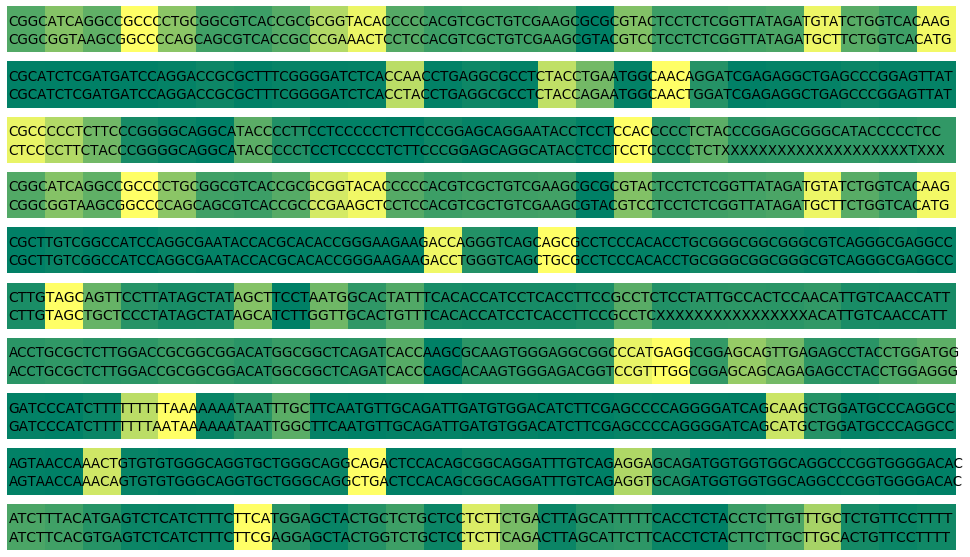

In [232]:
get_signatures('liver',predictions,last_conv_output,amp_layer_weights,X_train)

In [106]:
test = np.argsort(predictions[:,1])

In [110]:
test[-1]

753133

In [111]:
predictions[753133]

array([3.2946768e-16, 9.5183462e-01, 2.1618774e-02, 3.1709729e-04,
       1.7029053e-03, 7.9509113e-03, 1.7084864e-03, 1.0385570e-03,
       4.3292466e-04, 1.2406209e-02, 2.6206110e-04, 2.6137871e-04,
       4.6602992e-04], dtype=float32)

In [208]:
def get_signatures_seqs(tumor_type,predictions,last_conv_output,amp_layer_weights,X_val):
    tumor_list = ['normal','bladder','breast','colorectal','glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver']
    t = tumor_list.index(tumor_type)
    value_to_base = {48: 45, 49 : 65, 50 : 71 , 51 : 67 , 52 : 84}
    top_examples = np.argsort(predictions[:,t])[-1000:]
    top_seqs = []
    
    for k,j in enumerate(top_examples):
        weights = amp_layer_weights[:, t]
        final_output = np.dot(last_conv_output[j], weights)
        final_output = final_output
        
        ref_seq = np.argmax(X_val[j][0],axis=1)
        ref_seq = [''.join(ref_seq.astype('str').tolist())][0].translate(value_to_base)
        ref_seq=np.array([ref_seq[i:i+4] for i in range(0, len(ref_seq), 4)])
        ref_seq = ref_seq.reshape([-1,25])
        
        seq = np.argmax(X_val[j][1],axis=1)
        seq = [''.join(seq.astype('str').tolist())][0].translate(value_to_base)
        seq=np.array([seq[i:i+4] for i in range(0, len(seq), 4)])
        seq = seq.reshape([-1,25])
    
        skip=0
        for i in range(len(final_output[0])):
            if i + skip > len(final_output[0])-1:
                break
                
            if final_output[0][i+skip] > 0:
                importance = final_output[0][i+skip]
                x = seq[0][i+skip]
                xx = ref_seq[0][i+skip]
                skip=0
                
                if i > len(final_output[0])-2:
                        break
                        
                while final_output[0][i + 1] > 0:
                    importance = importance + final_output[0][i+1]
                    skip=skip+1
                    i = i + 1
                    y = seq[0][i]
                    yy = ref_seq[0][i]
                    x = x + y
                    xx = xx + yy
                    
                    if i > len(final_output[0])-2:
                        break
                        
                top_seqs.append((xx,x,importance))
                
    top_seqs=pd.DataFrame(top_seqs)
    top_seqs = top_seqs.groupby([0,1]).aggregate({2:['mean','count']})
    top_seqs.columns = top_seqs.columns.get_level_values(1)
    top_seqs['mean*count']=top_seqs['mean']*top_seqs['count']
    return(top_seqs)
        
        

In [209]:
blad_signatures = get_signatures_seqs('bladder',predictions,last_conv_output,amp_layer_weights,X_train)

In [237]:
blad_signatures.sort_values(['mean*count'],ascending=False).head(20)

,,mean,count,mean*count
0,1,,,
CTCA,CTTA,65.675674,24,1576.216167
ATGAATGA,ATAAATAA,105.666430,12,1267.997154
CCTC,CCTG,77.779746,15,1166.696186
GCTC,GCTG,64.944389,17,1104.054607
CTCACTCA,CTTACTTA,133.980039,8,1071.840309
TCTC,TCTG,74.685553,14,1045.597740
TTCA,TTTA,57.671157,18,1038.080826
CTGA,CTAA,63.056817,16,1008.909077
CATC,CATG,69.668115,13,905.685501


In [211]:
lung_signatures = get_signatures_seqs('lung',predictions,last_conv_output,amp_layer_weights,X_train)

In [239]:
lung_signatures.sort_values(['mean*count'],ascending=False).head(10)

,,mean,count,mean*count
0,1,,,
GGGG,GTGG,44.803573,8,358.428585
GGTCGGTCCGTG,GGTAGGTAACTG,159.669815,2,319.339630
GGTG,GTTG,38.266541,8,306.132324
GGCCCCAT,GGCCAAAT,89.676956,3,269.030869
TCCCTCCCCAGGTCAT,TCCATCCAAAGGTCAT,126.131210,2,252.262421
GCCTGCCTCGGCCACCCGCG,GCCTGCCTAAGCCACCAGCG,124.771141,2,249.542282
ACGATGATGAGGCCCAGGATCTGT,ACGATGATGAGTCCCATTATGTGT,117.515015,2,235.030029
AGCCAGCCCGAG,AGCCAGCCAGAG,78.167747,3,234.503242
CCTCCCTCCCACTTGCGCTGGGTG,CCTCCCTCCAACTTGAGCTGGGAG,112.450432,2,224.900864


In [235]:
skin_signatures = get_signatures_seqs('skin',predictions,last_conv_output,amp_layer_weights,X_train)

In [238]:
skin_signatures.sort_values(['mean*count'],ascending=False).head(10)

,,mean,count,mean*count
0,1,,,
CTCCCTCC,CTTTCTTT,273.136314,6,1638.817886
CTTCCTTCCTTT,CTTTCTTTTTTT,302.177643,4,1208.710571
TTCC,TTTC,83.493270,13,1085.412514
CTTC,CTTT,91.110146,11,1002.211605
TCTCCTTT,TCTTTTTT,161.271838,5,806.359192
TTTCTTTC,TTTTTTTT,168.812729,4,675.250916
CTCC,CTTT,132.571730,5,662.858650
CCGGCCGG,CCAACCAA,218.585027,3,655.755081
AAATGGGA,AAATAAGA,160.861458,4,643.445831


In [214]:
liver_signatures = get_signatures_seqs('liver',predictions,last_conv_output,amp_layer_weights,X_train)

In [215]:
liver_signatures.sort_values(['mean*count'],ascending=False).head(10)

,,mean,count,mean*count
0,1,,,
CTGGCTGGAGCTGCGG,CTGGCTGGTGCTGCGG,57.427559,5,287.137794
GAGC,GTGC,30.717323,7,215.021259
CTGGCGGCCCATGAGGCGGAGCAGTTGAGAGC,CTGGCGGTCCGTTTGGCGGAGCAGCAGAGAGC,107.390282,2,214.780563
GTGGGTGGGAGGCGGCCCATGAGGCGGAGCAGTTGAGAGC,GTGGGTGGGAGACGGTCCGTTTGGCGGAGCAGCAGAGAGC,102.729462,2,205.458923
AAGCAAGC,ATGCATGC,61.303094,3,183.909283
CTATGTCTGCAGGGAGTGTGGGCGGGGCTTTCGCAATAAGTCACACCTCCTCAGACACCAGAGGACACACACAGGGGAGAAGCCCTAC,CTA------------------------------------------------------------------------------------T,90.664234,2,181.328468
GCCCGCCCTCCCTCCCCAGCCCTCCCCACCCTGCCCGCTCCGCC,GCCCCCCCCCCCCCCCCCGCCCCCCCCCCCCCCCCCCCTCCGCC,89.767197,2,179.534393
CAAGCAAG,CATGCATG,54.166332,3,162.498997
CAGCAGATGAAA,CAGCTGATTTAA,80.229065,2,160.458130


In [216]:
renal_signatures = get_signatures_seqs('renal',predictions,last_conv_output,amp_layer_weights,X_train)

In [217]:
renal_signatures.sort_values(['mean*count'],ascending=False).head(10)

,,mean,count,mean*count
0,1,,,
--------,AAAAAAAA,38.893335,13,505.613358
----,AAAA,17.492642,23,402.330760
------------,AAGAAAGAAGAA,37.159491,9,334.435417
CTACCTACCACCACTACCACT------------------AATAG,CTACCTACTAC---TACCACTATAATAATAATAATAATAAATAG,128.056763,2,256.113525
----,AAGA,12.586613,19,239.145653
AGATAGATG----------------------A,AGAAAGAAGGAAAGAAGAAAGAAAGAAGAAAA,107.190369,2,214.380737
AAT--------CA------G,AATAATGAATGCACATCATG,102.416496,2,204.832993
CCCT------------TATCTATC------TCCCAG,CCCTTATCTATCTATCTATCTATCTATATATCCCAG,101.835312,2,203.670624
----,TATA,9.229853,22,203.056776


In [218]:
os.getcwd()

'/Users/beth/Desktop/MetisProject5data_2'

In [219]:
for i in ['normal','bladder','breast','colorectal','glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver']:
    sigs = get_signatures_seqs(i,predictions,last_conv_output,amp_layer_weights,X_train)
    with open('{}_signatures_more_filters.pickle'.format(i), 'wb') as write_file:
        pickle.dump(sigs, write_file)



FileNotFoundError: [Errno 2] No such file or directory: 'glioma/blastoma_signatures_more_filters.pickle'

In [220]:
for i in ['lung','pancreatic','renal','prostate','skin','stomach','uterine','liver']:
    sigs = get_signatures_seqs(i,predictions,last_conv_output,amp_layer_weights,X_train)
    with open('{}_signatures_more_filters.pickle'.format(i), 'wb') as write_file:
        pickle.dump(sigs, write_file)

In [221]:
sigs = get_signatures_seqs('glioma/blastoma',predictions,last_conv_output,amp_layer_weights,X_train)
with open('glio_signatures_more_filters.pickle', 'wb') as write_file:
    pickle.dump(sigs, write_file)

# Testing on anonymized lung patient exome ctDNA sequencing
### SRR3706303 from NCBI SRA. Shanghai Chest Hospital 2016 study, publically available
Was processed first to match input format (dashes in reference for insertions and dashes in sequence for deletions)

In [55]:
with open('patient_ctDNA_dashes.pickle', 'rb') as read_file:
    patient_data = pickle.load(read_file)

In [56]:
patient_data[0]

('GGCCCGGAAGGATGGACTCCGAGGCGGGGCTGAAAAGGGGGCAGCCGCGCCAAGCAGGAAGCGCCCCGGGGTGGGGCGGGAGGCCCGGAGGCCCCGGAGCCAGAGCGGGCAGGGCCGGCGCTGCGCGGTCGCCGAGGGACCCACGTGCGGG',
 'GGCCCGGAAGGATGGACTCCGAGGCGGGGCTGAAACGGGGGCAGCCGCGCCAAGCAGGAAGCGCCCCGGGGTGGGGCGGGAGGCCCGGAGGCCCCGGAGCCAGAGCGGGCAGGGCCGGCGCTGCGCGGTCGCCGAGGGACCCACGTGCGGG')

In [57]:
np.sum([i[0]==i[1] for i in patient_data])

400988

In [58]:
len(patient_data)

844473

In [72]:
for i in range(len(patient_data)):
    try:
        if 'n' in patient_data[i][0] or 'n' in patient_data[i][1]:
            patient_data.remove(patient_data[i])
    except:
        continue

In [73]:
for i in range(len(patient_data)):
    try:
        if 'N' in patient_data[i][0] or 'N' in patient_data[i][1]:
            patient_data.remove(patient_data[i])
    except:
        continue

In [74]:

range(len(patient_data))

range(0, 843958)

In [29]:
pd.Series(map(len,patient_data)).value_counts()

2    843958
dtype: int64

In [75]:
patient_data = list(map(list, patient_data))

In [76]:
patient_data[0]

['GGCCCGGAAGGATGGACTCCGAGGCGGGGCTGAAAAGGGGGCAGCCGCGCCAAGCAGGAAGCGCCCCGGGGTGGGGCGGGAGGCCCGGAGGCCCCGGAGCCAGAGCGGGCAGGGCCGGCGCTGCGCGGTCGCCGAGGGACCCACGTGCGGG',
 'GGCCCGGAAGGATGGACTCCGAGGCGGGGCTGAAACGGGGGCAGCCGCGCCAAGCAGGAAGCGCCCCGGGGTGGGGCGGGAGGCCCGGAGGCCCCGGAGCCAGAGCGGGCAGGGCCGGCGCTGCGCGGTCGCCGAGGGACCCACGTGCGGG']

In [77]:
for i in range(len(patient_data)):
    try:
        if len(patient_data[i][0]) > 100:
            patient_data[i][0] = patient_data[i][0][:100]
        
        if len(patient_data[i][1]) > 100:
            patient_data[i][1] = patient_data[i][1][:100]
    except:
        continue
    

In [78]:
for i in range(len(patient_data)):
    try:
        if len(patient_data[i][0]) > len(patient_data[i][1]):
            patient_data[i][0] = patient_data[i][0][:len(patient_data[i][1])]
        
        if len(patient_data[i][1]) > len(patient_data[i][0]):
            patient_data[i][1] = patient_data[i][1][:len(patient_data[i][0])]
    except:
        continue
    

In [79]:
patient_data = list(filter(lambda x: isinstance(x[0],str), patient_data)) #some error about float?

In [80]:
len(patient_data)

843956

In [81]:
base_to_value = {45 : 48 ,65 : 49, 71 : 50 , 67 : 51 , 84 : 52}

patient_data = list(map(lambda x: [[int(i.upper().translate(base_to_value)) for i in x[0]],
                                  [int(i.upper().translate(base_to_value)) for i in x[1]]], patient_data ))


In [83]:
from keras.preprocessing.sequence import pad_sequences

In [84]:
pd.Series(map(lambda x: len(x[0]),patient_data)).value_counts()

100    835819
31        298
30        271
35        260
99        253
        ...  
62         47
73         40
63         40
67         38
69         37
Length: 71, dtype: int64

In [85]:
for i in range(len(patient_data)):
    patient_data[i] = pad_sequences(patient_data[i], padding="pre",maxlen=100, value=5) # removed later

In [86]:
pd.Series(map(lambda x: len(x[0]),patient_data)).value_counts()

100    843956
dtype: int64

In [113]:
patient_data = to_categorical(patient_data)

In [114]:
len(patient_data)

843956

In [115]:
patient_data.shape

(843956, 2, 100, 6)

In [116]:
patient_data[0] #6th column is the padding - want to remove and just have [0,0,0,0,0] for padding

array([[[0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        ...,
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.]],

       [[0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        ...,
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.]]], dtype=float32)

In [117]:
patient_data = patient_data[:,:,:,:-1] 

In [119]:
ctDNA_predictions = model.predict(patient_data)

In [120]:
results = pd.Series(np.argmax(ctDNA_predictions,axis=1)).value_counts().sort_index()

In [121]:
results #would have expected only 1% to be tumor

0     688575
1      10247
2        842
3        566
4       2213
5      33343
6       7381
7      11884
8       8186
9      20451
10      6289
11      8938
12     45041
dtype: int64

In [122]:
results = np.array(results)

In [123]:
results.reshape([-1,13]).shape

(1, 13)

In [124]:
results.reshape([-1,13])[:,1:].shape

(1, 12)

In [125]:
import matplotlib.pyplot as plt

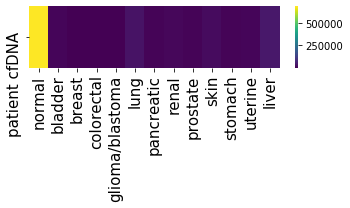

In [126]:
plt.figure(figsize=(5,3))
import seaborn as sns
sns.heatmap(results.reshape([-1,13]), cmap='viridis',yticklabels=['patient cfDNA'],xticklabels=['normal','bladder','breast','colorectal',\
                                               'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver'],
           );
plt.tight_layout()
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.savefig('patient_1_heatmap.jpg')

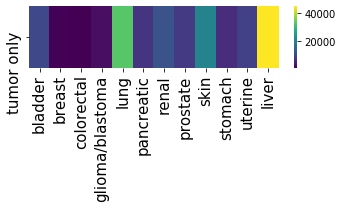

In [127]:
plt.figure(figsize=(5,3))
import seaborn as sns
sns.heatmap(results.reshape([-1,13])[:,1:], yticklabels=['tumor only'],cmap='viridis',xticklabels=['bladder','breast','colorectal',\
                                               'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver'],
           );

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.savefig('patient_1_ctDNA_tumors.jpg')

In [128]:
sum_probs = ctDNA_predictions.sum(axis=0)

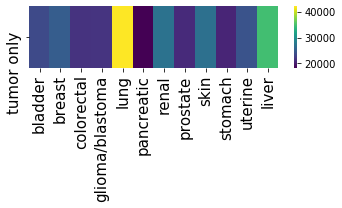

In [129]:
plt.figure(figsize=(5,3))
sns.heatmap(sum_probs.reshape([-1,13])[:,1:], yticklabels=['tumor only'],cmap='viridis',xticklabels=['bladder','breast','colorectal',\
                                               'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver'],
           );

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.savefig('patient_1_ctDNA_tumors_probs.jpg')

In [130]:
del patient_data, ctDNA_predictions

### Patient 2 
SRR3706282 from same study. Results are nearly identical

In [132]:
with open('patient_ctDNA_2_dashes.pickle', 'rb') as read_file:
    patient_data = pickle.load(read_file)

In [133]:
patient_data[0]

('GTGTGCCCTGCCCTCCCAGCCCTCCGCCCCCTCAGCCCCTTCCTCCCCAAGCGTCCAGCCCGACCCAGCCACAGCTCCATGACCCGCCACAGTTTATCGGACAGACGGGCACCGTGCATCGTATCACGGACCGCGGGGACGTGCGCGTGC',
 'GTGTGCCCTGCCCTCCCAGCCCTCCGCCCCCTCAGCCCCTTCCTCCCCAAGCGTCCAGCCCGACCCAGCCACAGCTCCATGACCCGCCACAGTTTATCGGACAGACGGGCACTGTGCATCGTATCACGGACCGCGGGGACGTGCGCGTGC')

In [134]:
np.sum([i[0]==i[1] for i in patient_data])

332549

In [135]:
len(patient_data)

648125

In [151]:
for i in range(len(patient_data)):
    try:
        if 'n' in patient_data[i][0] or 'n' in patient_data[i][1]:
            patient_data.remove(patient_data[i])
    except:
        continue

In [152]:
for i in range(len(patient_data)):
    try:
        if 'N' in patient_data[i][0] or 'N' in patient_data[i][1]:
            patient_data.remove(patient_data[i])
    except:
        continue

In [153]:

range(len(patient_data))

range(0, 647455)

In [154]:
pd.Series(map(len,patient_data)).value_counts()

2    647455
dtype: int64

In [155]:
patient_data = list(map(list, patient_data))

In [156]:
patient_data[0]

['GTGTGCCCTGCCCTCCCAGCCCTCCGCCCCCTCAGCCCCTTCCTCCCCAAGCGTCCAGCCCGACCCAGCCACAGCTCCATGACCCGCCACAGTTTATCGGACAGACGGGCACCGTGCATCGTATCACGGACCGCGGGGACGTGCGCGTGC',
 'GTGTGCCCTGCCCTCCCAGCCCTCCGCCCCCTCAGCCCCTTCCTCCCCAAGCGTCCAGCCCGACCCAGCCACAGCTCCATGACCCGCCACAGTTTATCGGACAGACGGGCACTGTGCATCGTATCACGGACCGCGGGGACGTGCGCGTGC']

In [157]:
for i in range(len(patient_data)):
    try:
        if len(patient_data[i][0]) > 100:
            patient_data[i][0] = patient_data[i][0][:100]
        
        if len(patient_data[i][1]) > 100:
            patient_data[i][1] = patient_data[i][1][:100]
    except:
        continue
    

In [158]:
for i in range(len(patient_data)):
    try:
        if len(patient_data[i][0]) > len(patient_data[i][1]):
            patient_data[i][0] = patient_data[i][0][:len(patient_data[i][1])]
        
        if len(patient_data[i][1]) > len(patient_data[i][0]):
            patient_data[i][1] = patient_data[i][1][:len(patient_data[i][0])]
    except:
        continue
    

In [159]:
patient_data = list(filter(lambda x: isinstance(x[0],str), patient_data))

In [160]:
len(patient_data)

647454

In [161]:
base_to_value = {45 : 48 ,65 : 49, 71 : 50 , 67 : 51 , 84 : 52}

patient_data = list(map(lambda x: [[int(i.upper().translate(base_to_value)) for i in x[0]],
                                  [int(i.upper().translate(base_to_value)) for i in x[1]]], patient_data ))


In [162]:
pd.Series(map(lambda x: len(x[0]),patient_data)).value_counts()

100    641220
30        308
31        255
34        239
37        221
        ...  
85         21
80         20
84         20
87         15
83         14
Length: 71, dtype: int64

In [163]:
for i in range(len(patient_data)):
    patient_data[i] = pad_sequences(patient_data[i], padding="pre", maxlen=100, value=5)

In [164]:
pd.Series(map(lambda x: len(x[0]),patient_data)).value_counts()

100    647454
dtype: int64

In [165]:
patient_data = to_categorical(patient_data)

In [166]:
len(patient_data)

647454

In [167]:
patient_data.shape

(647454, 2, 100, 6)

In [168]:
patient_data = patient_data[:,:,:,:-1]

In [169]:
ctDNA_predictions = model.predict(patient_data)

In [170]:
results = pd.Series(np.argmax(ctDNA_predictions,axis=1)).value_counts().sort_index()

In [171]:
results 

0     517168
1       9190
2        742
3        346
4       2391
5      30717
6       6630
7       9555
8       6340
9      16602
10      5795
11      5777
12     36201
dtype: int64

In [172]:
results = np.array(results)

In [173]:
results.reshape([-1,13]).shape

(1, 13)

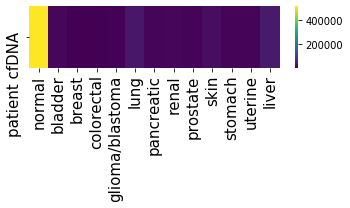

In [175]:
plt.figure(figsize=(5,3))
import seaborn as sns
sns.heatmap(results.reshape([-1,13]), cmap='viridis',yticklabels=['patient cfDNA'],xticklabels=['normal','bladder','breast','colorectal',\
                                               'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver'],
           );
plt.tight_layout()
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.savefig('patient_2_heatmap.jpg')

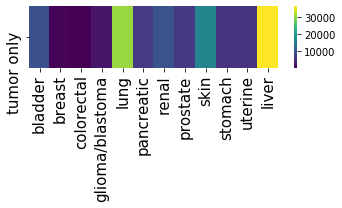

In [176]:
plt.figure(figsize=(5,3))
import seaborn as sns
sns.heatmap(results.reshape([-1,13])[:,1:], yticklabels=['tumor only'],cmap='viridis',xticklabels=['bladder','breast','colorectal',\
                                               'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver'],
           );

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.savefig('patient_2_ctDNA_tumors.jpg')

In [177]:
sum_probs = ctDNA_predictions.sum(axis=0)

In [179]:
sum_probs

array([402412.97 ,  19618.51 ,  19428.645,  16852.578,  17410.363,
        34947.72 ,  14656.277,  21635.236,  16511.805,  21440.291,
        16630.094,  18241.883,  27628.44 ], dtype=float32)

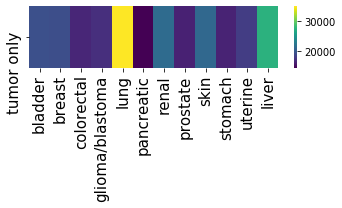

In [178]:
plt.figure(figsize=(5,3))
sns.heatmap(sum_probs.reshape([-1,13])[:,1:], yticklabels=['tumor only'],cmap='viridis',xticklabels=['bladder','breast','colorectal',\
                                               'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver'],
           );

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.savefig('patient_2_ctDNA_tumors_probs.jpg')

In [721]:
del patient_data, ctDNA_predictions